In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


# Proje Adım 1: Veri Yükleme ve Birleştirme

Bu ilk adımda amacımız, projemizin temelini oluşturan kaza verilerini çalışma ortamımıza almak ve analiz için tek, büyük bir veri çerçevesinde birleştirmek.

**Neden Bu Adımı Yapıyoruz?**

Veri setindeki kaza bilgileri farklı yıllara ait ayrı CSV dosyalarında bulunuyor (örneğin, accidents_2005_to_2007.csv, accidents_2009_to_2011.csv, accidents_2012_to_2014.csv). Eğer bu dosyaları tek tek analiz etmeye kalkarsak:

Zaman Kaybı: Her dosya için aynı analiz adımlarını tekrarlamak zorunda kalırız.

Karmaşıklık: Tüm yıllar boyunca genel eğilimleri veya desenleri görmek zorlaşır.

Tutarsızlık Potansiyeli: Farklı dosyalar arasında veri temizliği veya dönüşümlerde hatalar yapma olasılığımız artar.

Bu nedenle, tüm kaza verilerini tek bir Pandas DataFrame'inde birleştirmek, daha sonraki analizlerimizi (eksik değer analizi, veri tiplerini kontrol etme, istatistiksel analizler, modelleme) çok daha kolay ve verimli hale getirecektir. Bu, veri biliminde "Veri Entegrasyonu" olarak bilinen önemli bir adımdır.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tüm uyarıları kapatmak için:
warnings.filterwarnings("ignore")

# Kaza veri setlerinin yolları
accident_files = [
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv',
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv',
    '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv'
]

# Tüm kaza verilerini depolamak için boş bir liste oluşturuyoruz.
# Her bir CSV dosyasını okuduğumuzda, okunan DataFrame'i bu listeye ekleyeceğiz.
df_list = []

print("Kaza veri dosyaları yükleniyor...")
# Her bir dosya yolu üzerinde döngü yapıyoruz.
for file_path in accident_files:
    try:
        # pd.read_csv() fonksiyonu ile CSV dosyasını okuyoruz ve geçici bir DataFrame'e (df_temp) atıyoruz.
        df_temp = pd.read_csv(file_path)
        # Okunan DataFrame'i df_list'e ekliyoruz.
        df_list.append(df_temp)
        print(f"'{file_path}' başarıyla yüklendi. Satır sayısı: {len(df_temp)}")
    except FileNotFoundError:
        # Eğer belirtilen yolda dosya bulunamazsa hata mesajı veriyoruz.
        print(f"Hata: '{file_path}' bulunamadı. Lütfen dosya yolunu kontrol edin.")
    except Exception as e:
        # Diğer olası hataları yakalamak için genel bir hata mesajı.
        print(f"Hata oluştu '{file_path}' okunurken: {e}")

# Eğer liste boş değilse (yani en az bir dosya yüklenebildiyse),
# pd.concat() fonksiyonu ile listedeki tüm DataFrame'leri dikey olarak (alt alta) birleştiriyoruz.
# ignore_index=True parametresi, birleştirme sonrası indekslerin sıfırdan başlamasını sağlar,
# bu da yinelenen indeks sorunlarını önler.
if df_list:
    df_accidents = pd.concat(df_list, ignore_index=True)
    print("\n--- Tüm Kaza Verileri Başarıyla Birleştirildi! ---")
    print(f"Toplam kaza kaydı: {len(df_accidents)} satır ve {df_accidents.shape[1]} sütun.")
else:
    # Eğer hiç dosya yüklenememişse, kullanıcıya bilgi veriyoruz.
    print("\nHiçbir kaza dosyası yüklenemedi. Devam edilemiyor.")

# Birleştirilmiş veri çerçevesinin ilk 5 satırını görüntülüyoruz.
# Bu, verinin nasıl göründüğü, hangi sütunların olduğu hakkında hızlı bir fikir verir.
print("\n--- Birleştirilmiş Kaza Verisi İlk 5 Satır ---")
print(df_accidents.head())

# Veri setinin genel bilgilerini görüntülüyoruz.
# Bu, her sütunun adını, boş olmayan değer sayısını ve veri tipini gösterir.
# Bu bilgi, eksik değerleri ve yanlış veri tiplerini tespit etmek için kritik öneme sahiptir.
print("\n--- Birleştirilmiş Kaza Verisi Bilgileri ---")
df_accidents.info()

Kaza veri dosyaları yükleniyor...
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv' başarıyla yüklendi. Satır sayısı: 570011
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv' başarıyla yüklendi. Satır sayısı: 469442
'/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv' başarıyla yüklendi. Satır sayısı: 464697

--- Tüm Kaza Verileri Başarıyla Birleştirildi! ---
Toplam kaza kaydı: 1504150 satır ve 33 sütun.

--- Birleştirilmiş Kaza Verisi İlk 5 Satır ---
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0       

# Çıktıların Analizi
**Veri Birleştirme Başarısı:**

Tüm kaza dosyaları başarıyla yüklendi ve birleştirildi. Toplam 1,504,150 kaza kaydı ve 33 sütunumuz var. Bu, büyük bir veri seti ve analizi için yeterli bilgiye sahibiz demektir.

**1.df.head() Çıktısı (İlk 5 Satır):**

Sütun isimleri ve ilk birkaç gözlem, veri setinin içeriği hakkında bir fikir veriyor.

Tarih (Date) ve Saat (Time) gibi sütunlar şu anda object (metin) tipinde görünüyor. Bunları ileride zaman serisi analizi yapabilmek için doğru datetime formatına dönüştürmemiz gerekecek.

Kaza şiddeti (Accident_Severity), araç sayısı (Number_of_Vehicles), ölü/yaralı sayısı (Number_of_Casualties) gibi önemli sayısal sütunlar mevcut.

**2.df.info() Çıktısı (Veri Seti Bilgileri):**

Toplam Kayıt Sayısı: 1,504,150.

Sütun Sayısı: 33.

**3.Veri Tipleri (Dtype):** float64 (ondalıklı sayılar), int64 (tam sayılar), object (metin veya karışık tipler) mevcut. Özellikle object tipindeki sütunları (Date, Time, Road_Type, Light_Conditions, Weather_Conditions vb.) daha yakından incelememiz gerekecek.

Non-Null Count (Boş Olmayan Değer Sayısı): Bu kısım bize her sütunda kaç tane boş olmayan (NaN - Not a Number) değer olduğunu gösteriyor. Toplam kayıt sayısıyla karşılaştırıldığında, bazı sütunlarda önemli miktarda eksik değer olduğunu görebiliyoruz:

Junction_Detail: Tamamen boş (0 non-null). Bu sütun muhtemelen hiçbir işimize yaramayacak.

Special_Conditions_at_Site ve Carriageway_Hazards: Çok büyük oranda boş.

Junction_Control, Time, Weather_Conditions, Road_Surface_Conditions, Did_Police_Officer_Attend_Scene_of_Accident, LSOA_of_Accident_Location, Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude: Bu sütunlarda da bir miktar eksik değer var, ancak Junction_Detail kadar kritik değiller.

# Proje Adım 2: Veri Keşfi (EDA) - Eksik Değer Analizi
Bu adımda amacımız, hangi sütunlarda ne kadar eksik veri olduğunu görselleştirmek ve verinin genel yapısı hakkında daha derinlemesine bilgi edinmek.

**Neden Bu Adımı Yapıyoruz?**

*Veri Kalitesi Anlayışı:* Eksik değerler, veri setimizdeki boşlukları ve güvenilmez bilgileri gösterir. Bu boşlukların ne kadar yaygın olduğunu anlamak, sonraki veri temizleme stratejilerimizi belirlememiz için hayati öneme sahiptir.

*Öncelik Belirleme:* Hangi sütunların daha fazla dikkat gerektirdiğini (silinmeli mi, doldurulmalı mı?) anlamamıza yardımcı olur.

*Potansiyel Sorunları Belirleme:* Bazı sütunların tamamen veya büyük ölçüde boş olması, onların analizden çıkarılması gerektiğine işaret eder.


--- Eksik Değer Yüzdeleri (Birleştirilmiş Kaza Verisi) ---
                                    column_name  missing_percentage
18                              Junction_Detail          100.000000
28                          Carriageway_Hazards           98.188346
27                   Special_Conditions_at_Site           97.567929
19                             Junction_Control           40.078117
31                    LSOA_of_Accident_Location            7.195958
30  Did_Police_Officer_Attend_Scene_of_Accident            0.194263
26                      Road_Surface_Conditions            0.130173
25                           Weather_Conditions            0.008377
11                                         Time            0.007778
4                                      Latitude            0.006715
3                                     Longitude            0.006715
1                         Location_Easting_OSGR            0.006715
2                        Location_Northing_OSGR         

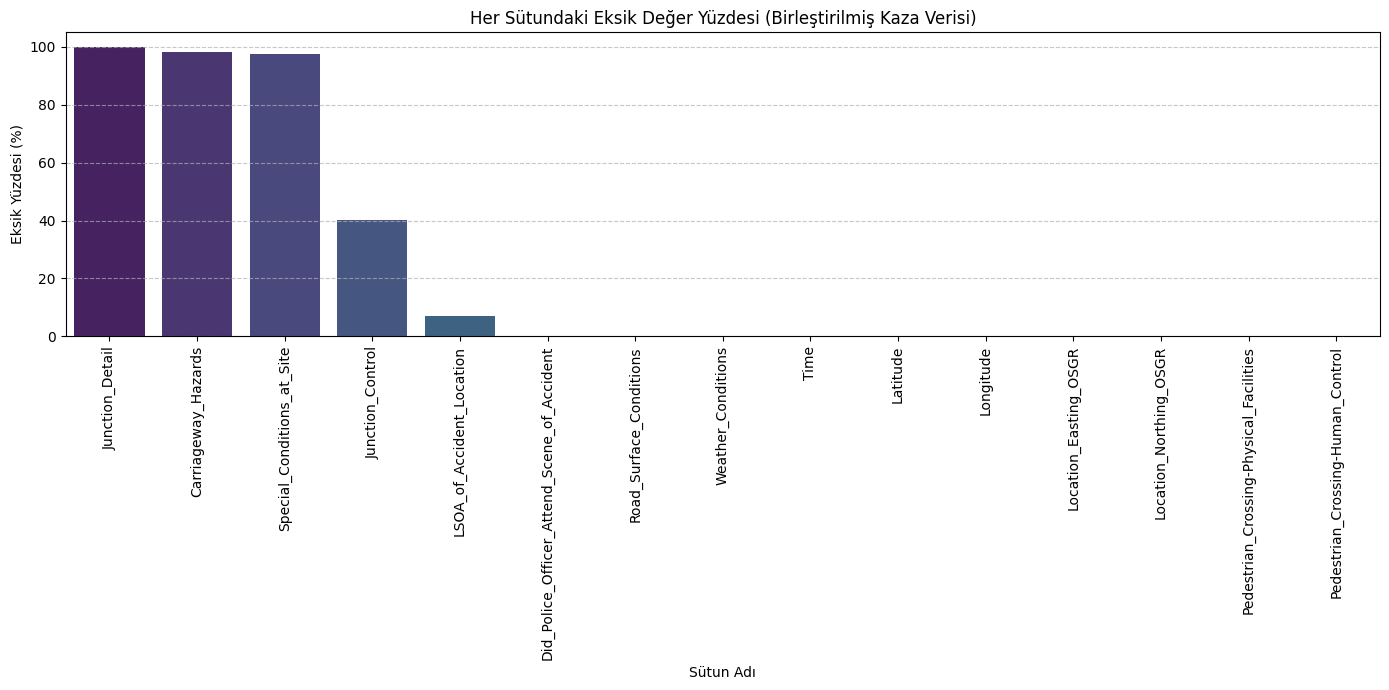


--- Sayısal Sütunların Temel İstatistikleri (Birleştirilmiş Kaza Verisi) ---
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.504049e+06            1.504049e+06  1.504049e+06   
mean            4.396214e+05            3.001584e+05 -1.436625e+00   
std             9.511616e+04            1.610084e+05  1.398078e+00   
min             6.495000e+04            1.029000e+04 -7.516225e+00   
25%             3.750600e+05            1.782600e+05 -2.373902e+00   
50%             4.399600e+05            2.688300e+05 -1.403714e+00   
75%             5.230600e+05            3.981510e+05 -2.215100e-01   
max             6.553700e+05            1.208800e+06  1.759398e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.504049e+06  1.504150e+06       1.504150e+06        1.504150e+06   
mean   5.258940e+01  3.020536e+01       2.838190e+00        1.831606e+00   
std    1.449889e+00  2.551603e+01       4.018423e-01        7.1

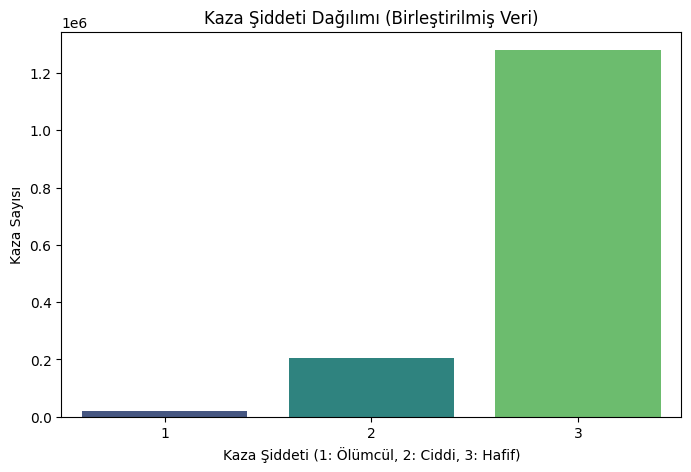

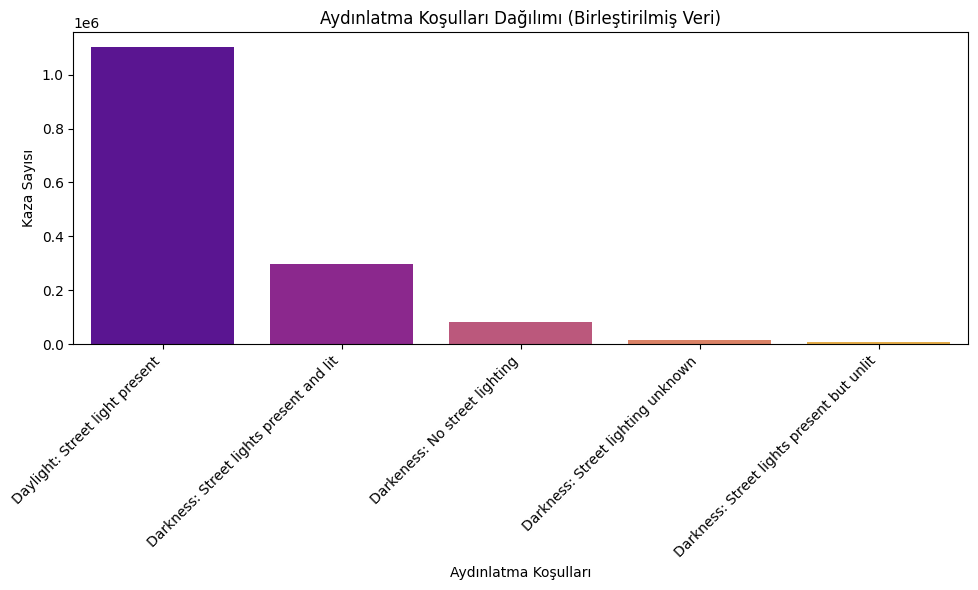

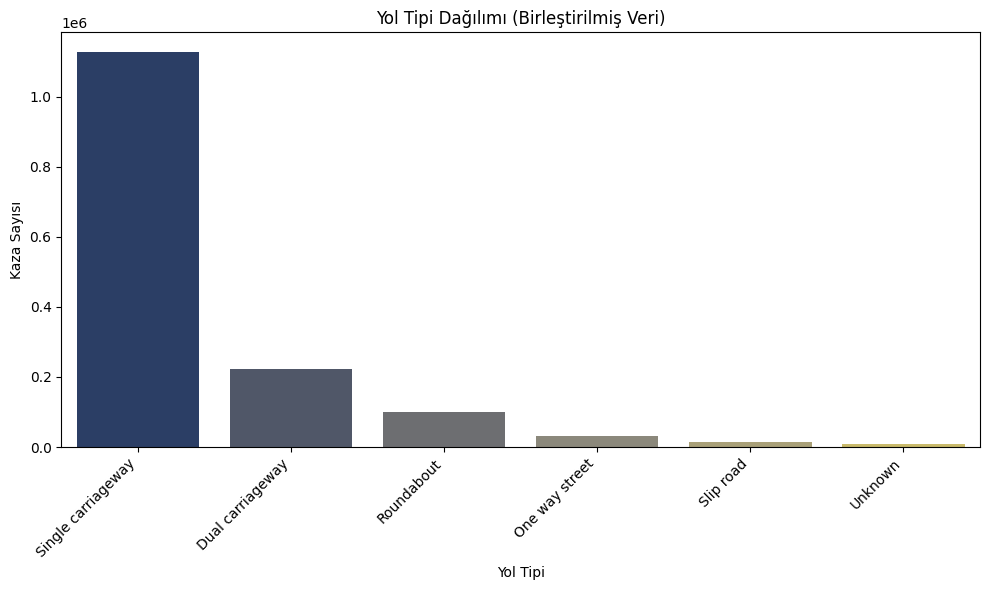

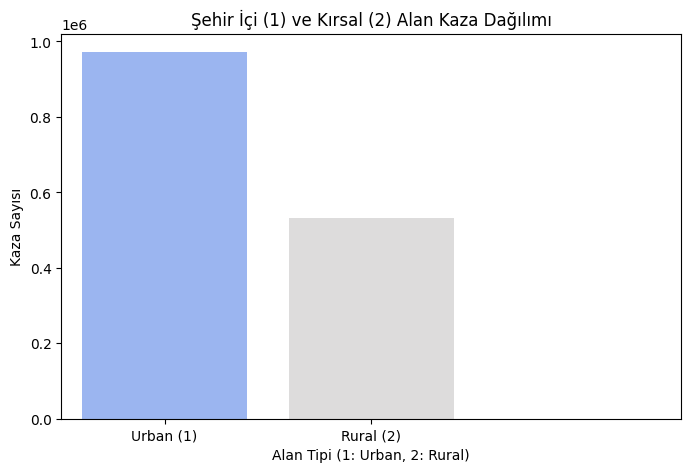

In [11]:
# Eksik değerlerin yüzdesini hesapla
# .isnull().sum() her sütundaki null değer sayısını verir.
# / len(df_accidents) ile toplam satır sayısına bölerek yüzdeyi buluruz.
# * 100 ile yüzde formatına çeviririz.
missing_percentage = df_accidents.isnull().sum() * 100 / len(df_accidents)

# Bu yüzdeleri bir DataFrame'e dönüştürüyoruz ki kolayca sıralayabiliriz.
missing_df = pd.DataFrame({'column_name': missing_percentage.index,
                           'missing_percentage': missing_percentage.values})
# Eksik değer yüzdelerine göre azalan sırayla sıralıyoruz.
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print("\n--- Eksik Değer Yüzdeleri (Birleştirilmiş Kaza Verisi) ---")
# Sadece eksik değeri olan sütunları ve yüzdelerini göster.
# Bu, tam dolu sütunları görmezden gelmemizi sağlar.
print(missing_df[missing_df['missing_percentage'] > 0])

# --- Eksik Değerleri Görselleştirme ---
# Görselleştirmeyi sadece eksik değeri olan sütunlar için yapıyoruz.
missing_df_to_plot = missing_df[missing_df['missing_percentage'] > 0]

if not missing_df_to_plot.empty:
    plt.figure(figsize=(14, 7)) # Grafiğin boyutunu ayarlıyoruz.
    sns.barplot(x='column_name', y='missing_percentage', data=missing_df_to_plot, palette='viridis')
    plt.xticks(rotation=90) # Sütun isimleri uzun olabileceği için etiketleri 90 derece döndürüyoruz.
    plt.title('Her Sütundaki Eksik Değer Yüzdesi (Birleştirilmiş Kaza Verisi)')
    plt.ylabel('Eksik Yüzdesi (%)')
    plt.xlabel('Sütun Adı')
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Yatay ızgara çizgileri ekliyoruz.
    plt.tight_layout() # Grafiğin sıkışmamasını sağlar.
    plt.show()
else:
    print("\nVeri setinde eksik değer bulunmamaktadır.")

# --- Temel İstatistikler ---
# df.describe() fonksiyonu, sayısal sütunlar için temel istatistikleri (sayı, ortalama, std, min, max, çeyreklikler) hesaplar.
# Bu, verinin merkezi eğilimi ve yayılımı hakkında hızlı bir fikir verir.
print("\n--- Sayısal Sütunların Temel İstatistikleri (Birleştirilmiş Kaza Verisi) ---")
print(df_accidents.describe())

# --- Kategorik Sütunların Benzersiz Değerleri ve Frekansları ---
print("\n--- Kategorik Sütunlardaki Benzersiz Değerler ve Frekansları (Birleştirilmiş Kaza Verisi) ---")
# DataFrame'deki object (genellikle metinsel) tipindeki sütunları seçiyoruz.
for column in df_accidents.select_dtypes(include='object').columns:
    # Eğer sütundaki benzersiz değer sayısı 50'den az ise (yani çok fazla kategori yoksa),
    # o sütunun her bir kategorisinin kaçar kez geçtiğini (frekansını) gösteriyoruz.
    if df_accidents[column].nunique() < 50:
        print(f"\nSütun: {column}")
        print(df_accidents[column].value_counts())
    else:
        # Eğer çok fazla benzersiz değer varsa (örneğin ID'ler veya serbest metin alanları),
        # tüm unique değerleri listelemek yerine ilk 5'ini gösteriyoruz.
        print(f"\nSütun: {column} - Çok fazla benzersiz değer (örneğin ID'ler). Benzersiz değer sayısı: {df_accidents[column].nunique()}. İlk 5: {df_accidents[column].head().tolist()}")

# --- Önemli Kategorik Sütunların Dağılımını Görselleştirme ---
# Kaza şiddeti dağılımı: 1 (Ölümcül), 2 (Ciddi), 3 (Hafif)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_accidents, x='Accident_Severity', palette='viridis')
plt.title('Kaza Şiddeti Dağılımı (Birleştirilmiş Veri)')
plt.xlabel('Kaza Şiddeti (1: Ölümcül, 2: Ciddi, 3: Hafif)')
plt.ylabel('Kaza Sayısı')
plt.show()

# Aydınlatma Koşulları dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x='Light_Conditions', palette='plasma', order=df_accidents['Light_Conditions'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Aydınlatma Koşulları Dağılımı (Birleştirilmiş Veri)')
plt.xlabel('Aydınlatma Koşulları')
plt.ylabel('Kaza Sayısı')
plt.tight_layout()
plt.show()

# Yol Tipi dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accidents, x='Road_Type', palette='cividis', order=df_accidents['Road_Type'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Yol Tipi Dağılımı (Birleştirilmiş Veri)')
plt.xlabel('Yol Tipi')
plt.ylabel('Kaza Sayısı')
plt.tight_layout()
plt.show()

# Şehir içi/Kırsal Alan dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(data=df_accidents, x='Urban_or_Rural_Area', palette='coolwarm')
plt.title('Şehir İçi (1) ve Kırsal (2) Alan Kaza Dağılımı')
plt.xlabel('Alan Tipi (1: Urban, 2: Rural)')
plt.ylabel('Kaza Sayısı')
plt.xticks(ticks=[0, 1], labels=['Urban (1)', 'Rural (2)']) # Etiketleri daha açıklayıcı yapalım
plt.show()

## 📊 Çıktıların Detaylı Analizi ve Kararlar

---

### 🔍 1. Eksik Değer Analizi

| Sütun Adı                         | Eksik Yüzdesi (%) | Gözlem ve Karar                                                                                                                                       |
|----------------------------------|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Junction_Detail**              | %100              | Tamamen boş. Bu sütun hiçbir bilgi içermediği için **silinecek**.                                                                                   |
| **Carriageway_Hazards**          | %98.19            | Çok büyük oranda boş. Güvenilir bilgi sağlamaz. **Silinecek.**                                                                                      |
| **Special_Conditions_at_Site**   | %97.57            | Yine çok büyük oranda boş. **Silinecek.**                                                                                                           |
| **Junction_Control**             | %40.08            | Önemli miktarda eksik. Kavşak kontrol bilgisi önemli olabilir. Şimdilik bırakılacak, **eksik değer doldurma stratejisi sonra belirlenecek.**       |
| **LSOA_of_Accident_Location**    | %7.20             | Konum bilgisi içeriyor. Şimdilik bırakılacak, **modelleme aşamasında karar verilecek.**                                                             |
| **Diğer Sütunlar**               | <%1               | Eksikliği çok az. <br> Sayısal ise: Ortalama/medyan ile doldurulabilir. <br> Kategorik ise: Mod ile doldurma ya da “Bilinmiyor” olarak işaretleme. <br> İlk aşamada **eksik satırlar silinecek.** |

#### 🧾 Karar Özeti:
- **Silinecek Sütunlar**: `Junction_Detail`, `Carriageway_Hazards`, `Special_Conditions_at_Site`
- **İleride Ele Alınacak Eksikler**: `Junction_Control`, `LSOA_of_Accident_Location`
- **Küçük Eksikler**: İlgili satırlar **silinecek**

---

### 📈 2. Sayısal Sütunların Temel İstatistikleri

- **Konum Verileri** (`Location_Easting_OSGR`, `Location_Northing_OSGR`, `Longitude`, `Latitude`): Ortalama ve standart sapmalar makul. Coğrafi olarak anlamlı dağılımlar gösteriyor.
- **Accident_Severity**: Ortalama ≈ 2.83 → Çoğunlukla **Hafif** kazalar var. Veri kümesi **sınıf dengesizliğine** sahip, sınıflandırma modellerinde dikkate alınmalı.
- **Number_of_Vehicles & Number_of_Casualties**: Ortalama sırasıyla 1.83 ve 1.35. Maksimum değerlerin yüksek olması → **uç değerler** mevcut olabilir.
- **Speed_limit**: Ortalama ≈ 39 mph. Değerler mantıklı aralıkta (10–70 mph).
- **Year**: 2005–2014 arası. Veri kapsamı doğrulandı ✅

---

### 🧩 3. Kategorik Sütunlar – Benzersiz Değerler ve Frekansları

#### 🧷 Çok Fazla Benzersiz Değere Sahip:
- `Accident_Index`, `Date`, `Time`: Benzersiz olmaları normal.
- `Local_Authority_(Highway)`, `LSOA_of_Accident_Location`: Coğrafi analizlerde kullanılabilir.

#### 📌 Daha Az Benzersiz Değere Sahip:
- `Road_Type`, `Junction_Control`, `Pedestrian_Crossing-Human_Control`, `Pedestrian_Crossing-Physical_Facilities`, `Light_Conditions`, `Weather_Conditions`, `Road_Surface_Conditions`, `Did_Police_Officer_Attend_Scene_of_Accident`, `Urban_or_Rural_Area`

Bu sütunlar **kazanın gerçekleştiği koşullar** hakkında doğrudan bilgi verir. Frekans dağılımları mantıklı ve analiz için oldukça değerlidir.

> 🚩 **Not**: `Urban_or_Rural_Area` sütunu, projenin “**Kırsal ve kentsel alanlar nasıl farklılaştı?**” sorusuna yanıt vermek için kritik.  
> `1`: Urban (Şehir İçi)  
> `2`: Rural (Kırsal)

---


# Proje Adım 3: Veri Temizleme ve Tip Dönüşümleri

Bu adımda, veri setimizi analiz için daha uygun hale getireceğiz.

**Neden Bu Adımı Yapıyoruz?**

*Eksik Veri Yönetimi:* Analizleri bozabilecek veya modellerin performansını düşürebilecek eksik değerlerden kurtulmak.

*Doğru Veri Tipleri:* Tarih ve saat gibi verilerin doğru formatta olması, zaman tabanlı analizler (örneğin, kazaların günün saatine göre dağılımı, mevsimsel eğilimler) yapmamızı ve bu sütunları doğru şekilde kullanmamızı sağlar.

*Gereksiz Sütunları Kaldırma:* Analize katkısı olmayan veya çok fazla eksik değeri olan sütunları çıkararak veri setimizi daha sade ve yönetilebilir hale getirmek.

In [12]:
# --- 1. Gereksiz Sütunları Kaldırma ---
# Eksik değer analizi sonucunda tamamen veya çok büyük oranda boş olan sütunları belirliyoruz.
columns_to_drop = [
    'Junction_Detail',
    'Carriageway_Hazards',
    'Special_Conditions_at_Site'
]

# DataFrame'den bu sütunları kalıcı olarak siliyoruz.
# axis=1 sütunları, inplace=True ise DataFrame'i doğrudan değiştirir.
df_accidents.drop(columns=columns_to_drop, inplace=True)
print(f"\nKaldırılan sütunlar: {columns_to_drop}")
print(f"Yeni sütun sayısı: {df_accidents.shape[1]}")

# --- 2. Tarih ve Saat Sütunlarını Dönüştürme ---
# 'Date' sütununu datetime formatına çeviriyoruz.
# errors='coerce' parametresi, dönüştürülemeyen değerleri NaT (Not a Time) olarak ayarlar.
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], format='%d/%m/%Y', errors='coerce')

# 'Time' sütununu datetime formatına çeviriyoruz.
# Burada sadece saat ve dakika önemli, yıl/ay/gün önemsiz olduğu için sadece zaman kısmını dönüştürüyoruz.
df_accidents['Time'] = pd.to_datetime(df_accidents['Time'], format='%H:%M', errors='coerce').dt.time

# 'Date' sütunundan 'Year', 'Month', 'Day_of_Week_Name' ve 'Hour' sütunları türetiyoruz.
# Bu, zamana bağlı analizlerimizi kolaylaştıracak.
df_accidents['Year'] = df_accidents['Date'].dt.year # Zaten Year sütunu var gibi görünüyor, yine de kontrol edelim
df_accidents['Month'] = df_accidents['Date'].dt.month
df_accidents['Day_of_Week_Name'] = df_accidents['Date'].dt.day_name() # Haftanın günü adı (örn: Monday, Tuesday)
# Saat sütununu Time'dan türetiyoruz. Time object olduğu için önce string'e çevirip ilk 2 karakteri alıyoruz.
# Ancak Time'ı direkt datetime.time objesi olarak dönüştürdüğümüz için .hour ile alabiliriz.
# Not: Eğer Time sütununda eksik değerler varsa, .dt.hour da NaN döndürecektir.
# df_accidents['Hour'] = pd.to_datetime(df_accidents['Time'].astype(str), format='%H:%M', errors='coerce').dt.hour
# Alternatif ve daha doğru yol:
df_accidents['Hour'] = df_accidents['Time'].apply(lambda x: x.hour if x is not pd.NaT else pd.NA)


print("\n'Date' ve 'Time' sütunları dönüştürüldü ve yeni zaman sütunları türetildi.")

# --- 3. Kalan Az Miktardaki Eksik Değerleri İçeren Satırları Silme ---
# Eksik değer yüzdesi düşük olan sütunlardaki NaN değerlerini içeren satırları siliyoruz.
# Bu, veri setini çok fazla küçültmeden temizler.
# Belirlenen sütunlar:
# 'Time' (zaten dönüştürülürken NaT olmuş olabilir)
# 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'
# 'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control'
# 'Weather_Conditions', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident'
# 'LSOA_of_Accident_Location' (Burada daha az eksik kalanları siliyoruz)

# Sütun listesini yeniden tanımlayalım, çünkü bazıları zaten dönüştürüldü veya silindi.
columns_with_small_missing_values = [
    'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
    'Time', # Artık datetime.time object
    'Weather_Conditions',
    'Road_Surface_Conditions',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'Pedestrian_Crossing-Physical_Facilities',
    'Pedestrian_Crossing-Human_Control',
    'LSOA_of_Accident_Location'
]

# df_accidents.dropna() tüm NaN içeren satırları siler.
# subset parametresi sadece belirli sütunlarda NaN varsa silmeyi sağlar.
initial_rows = len(df_accidents)
df_accidents.dropna(subset=columns_with_small_missing_values, inplace=True)
rows_removed = initial_rows - len(df_accidents)
print(f"\n{rows_removed} satır, az miktarda eksik değer içerdiği için silindi.")
print(f"Kalan toplam kaza kaydı: {len(df_accidents)}")

# --- Temizlenmiş Veri Setinin Bilgilerini Tekrar Görüntüleme ---
print("\n--- Temizlenmiş Veri Seti Bilgileri ---")
df_accidents.info()

# Temizleme sonrası eksik değerleri kontrol et
print("\n--- Temizleme Sonrası Eksik Değer Yüzdeleri ---")
missing_percentage_after_cleaning = df_accidents.isnull().sum() * 100 / len(df_accidents)
missing_df_after_cleaning = pd.DataFrame({'column_name': missing_percentage_after_cleaning.index,
                                          'missing_percentage': missing_percentage_after_cleaning.values})
missing_df_after_cleaning = missing_df_after_cleaning.sort_values(by='missing_percentage', ascending=False)
print(missing_df_after_cleaning[missing_df_after_cleaning['missing_percentage'] > 0])


Kaldırılan sütunlar: ['Junction_Detail', 'Carriageway_Hazards', 'Special_Conditions_at_Site']
Yeni sütun sayısı: 30

'Date' ve 'Time' sütunları dönüştürüldü ve yeni zaman sütunları türetildi.

112419 satır, az miktarda eksik değer içerdiği için silindi.
Kalan toplam kaza kaydı: 1391731

--- Temizlenmiş Veri Seti Bilgileri ---
<class 'pandas.core.frame.DataFrame'>
Index: 1391731 entries, 0 to 1495360
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1391731 non-null  object        
 1   Location_Easting_OSGR                        1391731 non-null  float64       
 2   Location_Northing_OSGR                       1391731 non-null  float64       
 3   Longitude                                    1391731 non-null  float64       
 4   Latitude                                     1391731 non-nul

### 🧹 Temizleme Sonrası Durum Değerlendirmesi

#### ✅ Gereksiz Sütunlar Kaldırıldı:
- `Junction_Detail`, `Carriageway_Hazards`, `Special_Conditions_at_Site` sütunları başarıyla veri setinden çıkarıldı.
- Bu adım, veri setini daha sade, anlaşılır ve analiz odaklı hale getirdi.
- **Yeni sütun sayısı:** `30`.

---

#### 🕓 Tarih ve Saat Dönüşümleri:
- `Date` sütunu başarıyla `datetime64[ns]` formatına dönüştürüldü.
- Zamana dayalı analizler için oldukça faydalı hale geldi.
- Ayrıca şu yeni sütunlar başarıyla üretildi:
  - `Year`, `Month`, `Day_of_Week_Name`, `Hour`
- Bu sütunlar **tam dolu** ve analizlerde doğrudan kullanılabilir.

> 🔍 **Not:** `Time` sütunu hâlâ `object` tipinde görünmektedir. Bunun sebebi, `pd.to_datetime(df_accidents['Time'], format='%H:%M', errors='coerce').dt.time` ile yalnızca saat-objesine (`datetime.time`) dönüştürülmüş olmasıdır. Ancak bu bir sorun teşkil etmez, çünkü analizlerde esas olarak `Hour` ve `Date` sütunlarını kullanacağız.

---

#### ❌ Küçük Eksik Değerlerin Silinmesi:
- **112,419 satır** eksik değer içerdiği için silindi.
- Bu, toplam veri setinin yaklaşık **%7.5**’ine karşılık gelmektedir:
  
  \[
  \frac{112,419}{1,504,150} \approx 7.5\%
  \]

- Bu oran **kabul edilebilir** olup, veri setinin genel bütünlüğünü bozmaz.
- **Kalan toplam kaza kaydı:** `1,391,731`

---

#### 🔍 Temizleme Sonrası Eksik Değerler:
- Şu an sadece `Junction_Control` sütununda eksik veri bulunmaktadır:  
  - **Eksiklik oranı:** `%39.23`
- Diğer tüm sütunlar **tam dolu** (`Non-Null Count = 1,391,731`)
- `Junction_Control` sütunu önemli olabilir; ileride bu sütun için şu stratejilerden biri uygulanabilir:
  - En sık görülen kategoriyle doldurma (`mode`)
  - “Bilinmiyor” gibi yeni bir kategori ekleme
- Şimdilik bu sütunu olduğu gibi bırakıyoruz. Çünkü:
  - Her analizde bu sütunun kullanılması zorunlu değil.
  - Ana analizlerimiz için veri setimiz yeterince temiz ve güçlü durumda.


# Proje Adım 4: Trafik Akışı Verilerini Yükleme ve Kaza Verileriyle Birleştirme

Şimdi projemizin kritik bir aşamasına geliyoruz: trafik akışı verilerini kaza verileriyle ilişkilendirmek. Projenin ana sorularından biri **"Trafik akışının değişmesi kazaları nasıl etkiler?"** olduğundan, bu adım hayati önem taşıyor.

**Neden Bu Adımı Yapıyoruz?**

*Bütünsel Analiz:* Kazalar sadece kaza koşullarıyla değil, aynı zamanda yol üzerindeki genel trafik yoğunluğuyla da ilişkilidir. Trafik akışı verilerini dahil ederek, kazaların nedenleri ve desenleri hakkında daha kapsamlı bir anlayışa sahip olacağız.

*İlişkisel İnceleme:* Trafik akışı ile kaza sayısı veya kaza şiddeti arasında doğrudan bir korelasyon olup olmadığını inceleyebiliriz. Örneğin, trafik yoğunluğunun arttığı saatlerde veya bölgelerde kaza sayılarının da artıp artmadığını gözlemleyebiliriz.

Elimizdeki dosya listesine göre ukTrafficAADF.csv dosyasının trafik akışı verilerini içerdiğini varsayıyoruz (AADF = Annual Average Daily Flow). Bu dosyanın yapısını inceleyip kaza verilerimizle nasıl birleştirebileceğimizi bulmamız gerekecek.

In [13]:
# Trafik akışı veri setinin yolu
traffic_flow_data_path = '/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv'

try:
    df_traffic = pd.read_csv(traffic_flow_data_path)
    print("Trafik Akışı Verisi Başarıyla Yüklendi!")
except FileNotFoundError:
    print(f"Hata: Trafik akışı veri dosyası bulunamadı: {traffic_flow_data_path}. Lütfen dosya yolunu kontrol edin.")
except Exception as e:
    print(f"Trafik akışı verisi okunurken bir hata oluştu: {e}")

# İlk 5 satırı görüntüle
print("\n--- Trafik Akışı Verisi İlk 5 Satır ---")
print(df_traffic.head())

# Veri setinin genel bilgilerini görüntüle
print("\n--- Trafik Akışı Verisi Bilgileri ---")
df_traffic.info()

# Eksik değerlerin yüzdesini hesapla (trafik akışı verisi için)
missing_percentage_traffic = df_traffic.isnull().sum() * 100 / len(df_traffic)
missing_df_traffic = pd.DataFrame({'column_name': missing_percentage_traffic.index,
                                   'missing_percentage': missing_percentage_traffic.values})
missing_df_traffic = missing_df_traffic.sort_values(by='missing_percentage', ascending=False)

print("\n--- Eksik Değer Yüzdeleri (Trafik Akışı Verisi) ---")
print(missing_df_traffic[missing_df_traffic['missing_percentage'] > 0])

Trafik Akışı Verisi Başarıyla Yüklendi!

--- Trafik Akışı Verisi İlk 5 Satır ---
   AADFYear    CP Estimation_method Estimation_method_detailed  \
0      2000  6007           Counted               Manual count   
1      2000  6009           Counted               Manual count   
2      2000  6035           Counted               Manual count   
3      2000  6054           Counted               Manual count   
4      2000  6055           Counted               Manual count   

                     Region LocalAuthority  Road RoadCategory  Easting  \
0  Yorkshire and the Humber      Rotherham    M1           TM   446000   
1  Yorkshire and the Humber          Leeds  M621           TM   432150   
2  Yorkshire and the Humber      Doncaster   M18           TM   466400   
3  Yorkshire and the Humber     Calderdale   M62           TM   404000   
4  Yorkshire and the Humber          Leeds   M62           TM   426000   

   Northing  ... V2AxleRigidHGV V3AxleRigidHGV  V4or5AxleRigidHGV  \
0    389

### 🚦 Trafik Akışı Verisi (`df_traffic`) Analizi

---

#### 🔍 1. `df_traffic.head()` ve `df_traffic.info()` Çıktıları:

- **Toplam Kayıt Sayısı:** `275,385`
  - Bu, kaza veri setimizdeki (`1,391,731`) kayıttan daha az. Bu beklenen bir durumdur çünkü:
    - Trafik akışı ölçümleri belirli sabit noktalarda ve belirli zaman aralıklarında yapılır.
    - Oysa kazalar her yerde ve her zaman meydana gelebilir.

---

#### 🧩 Sütunlar ve Anlamları:

- `AADFYear`: Ölçüm yapılan yıl – *birleştirme için anahtar sütun*.
- `CP` (Count Point): Ölçüm noktası – *benzersiz olabilir, birleştirme için önemli*.
- `Easting`, `Northing`, `Lat`, `Lon`: Coğrafi koordinatlar – *kaza verisiyle eşleştirilebilir*.
- `Region`, `LocalAuthority`, `Road`, `RoadCategory`: Konum bilgileri.
- Araç Türlerine Göre Trafik Akışı (AADF – Annual Average Daily Flow):
  - `PedalCycles`, `Motorcycles`, `CarsTaxis`, `BusesCoaches`, `LightGoodsVehicles`, `V2AxleRigidHGV`, `V3AxleRigidHGV`, `V4or5AxleRigidHGV`, `V3or4AxleArticHGV`, `V5AxleArticHGV`, `V6orMoreAxleArticHGV`, `AllHGVs`, `AllMotorVehicles`
  - `AllMotorVehicles`: Tüm araçların günlük ortalamasını gösteren **ana sütun**.
- `Estimation_method`, `Estimation_method_detailed`: Trafik akışının tahmin yöntemleri.
- `StartJunction`, `EndJunction`, `LinkLength_km`, `LinkLength_miles`: Yol segmenti bilgileri.

---

#### ❌ 2. Eksik Değer Analizi:

| Sütun Adı                 | Eksik Oran (%) | Gözlem ve Karar |
|--------------------------|----------------|------------------|
| `Estimation_method`      | %13.64         | Tahmin yöntemi hakkında bilgi içeriyor. Şimdilik analizimizin ana odağı bu değil. Eksik bırakılabilir. |
| `Estimation_method_detailed` | %13.64     | Aynı şekilde kritik değil, şu an için bırakılabilir. |
| `StartJunction`          | %0.09          | Çok düşük eksiklik, bu sütunu kullanmadığımız için göz ardı edilebilir. |
| `EndJunction`            | %0.08          | Aynı şekilde göz ardı edilebilir. |

---

### ✅ Karar Özeti (`df_traffic`):

- Trafik akışı veri setindeki eksik değerler, kaza verisine kıyasla **daha az kritik**.
- Birleştirme işlemlerinde kullanacağımız **ana sütunlar (AADFYear, CP, Lat, Lon, AllMotorVehicles)** **tam dolu**.
- Bu nedenle, şimdilik **veri setinde kapsamlı bir temizlik yapmaya gerek yok**.
- Gerekirse tahmin yöntemi ile ilgili sütunlara daha sonra dönebiliriz.


# Proje Adım 5: Trafik Akışı ve Kaza Verilerini Birleştirme

#### 1. Trafik Verilerinin Hazırlanması
- `df_traffic` veri setinden sadece analiz için gerekli olan sütunlar (`AADFYear`, `Lon`, `Lat`, `AllMotorVehicles`) seçildi.
- Eksik değerler (`NaN`) bu alt veri setinden kaldırılarak `df_traffic_clean` oluşturuldu.
- Her yıl için trafik ölçüm noktalarının koordinatları `cKDTree` veri yapısına dönüştürülerek hızlı coğrafi yakınlık sorguları yapılabilir hale getirildi.
- Bu KDTree'ler `traffic_trees` adlı bir sözlükte, her yılın kendi ağacı olacak şekilde saklandı.

#### 2. Kaza Verilerinin Hazırlanması
- `df_accidents` veri setinden her kaza kaydına ait yıl (`Year`), enlem (`Latitude`) ve boylam (`Longitude`) değerleri alındı.
- Bu koordinatlar kullanılarak her kaza için aynı yıl içindeki en yakın trafik ölçüm noktası belirlendi.
- En yakın noktadaki `AllMotorVehicles` (yıllık ortalama günlük araç akışı) değeri kaza kaydına `Matched_Traffic_Flow` adlı yeni bir sütun olarak eklendi.

#### 3. Eşleştirme ve Sonuçların Değerlendirilmesi
- Eşleştirme işlemi büyük veri setlerinde zaman alabileceğinden `tqdm` kütüphanesiyle ilerleme çubuğu kullanıldı.
- Eşleştirme tamamlandıktan sonra, yeni eklenen sütunun `df_accidents` veri setindeki ilk birkaç satırı ve genel yapısı `info()` ile görüntülendi.
- `Matched_Traffic_Flow` sütunundaki eksik değerler (`NaN`) oranı hesaplandı ve eksikliği olan sütunlar listelendi.

#### Sonuç:
- Trafik akışı verisi, coğrafi yakınlık ve yıl bilgisi kullanılarak başarıyla kaza verilerine entegre edildi.
- Bu işlem sayesinde her kazaya en yakın trafik yoğunluğu değeri atanmış oldu.
- Eksik değer oranları göz önünde bulundurularak sonraki adımlarda bu eksiklikler analiz ya da modelleme için filtrelenebilir veya doldurulabilir.




In [14]:
from scipy.spatial import cKDTree
import numpy as np

print("\nTrafik akışı ve kaza verileri birleştiriliyor...")

# --- 1. Trafik Akışı Verilerini Hazırlama ---
# Trafik akışı verisinde sütun isimleri 'Lon' ve 'Lat' idi, bu doğru.
df_traffic_clean = df_traffic[['AADFYear', 'Lon', 'Lat', 'AllMotorVehicles']].dropna()
print(f"Temizlenmiş trafik akışı verisi boyutu: {df_traffic_clean.shape}")

# Her yıl için trafik sayım noktalarının koordinatlarını bir KDTree yapısına dönüştürelim.
traffic_trees = {}
for year in df_traffic_clean['AADFYear'].unique():
    yearly_traffic_data = df_traffic_clean[df_traffic_clean['AADFYear'] == year]
    # Sadece Longitude ve Latitude sütunlarını alıyoruz.
    points = yearly_traffic_data[['Lon', 'Lat']].values
    traffic_trees[year] = {
        'tree': cKDTree(points),
        'data': yearly_traffic_data.reset_index(drop=True)
    }
print("Yıllara göre trafik akışı KDTree'leri oluşturuldu.")

# --- 2. Kaza Verilerini Birleştirme İçin Hazırlama ---
# Hata aldığımız kısım burasıydı. df_accidents'taki sütun isimleri 'Longitude' ve 'Latitude' olmalı.
# df_accidents zaten temizlenmiş durumda.
# Kontrol edelim: df_accidents.columns # Bu komutu çalıştırıp sütun isimlerini görebilirsin.
# Tahminime göre, 'Lon' ve 'Lat' yerine 'Longitude' ve 'Latitude' kullanmalıyız.
accident_coords_year = df_accidents[['Year', 'Longitude', 'Latitude']].values # Düzeltme burada!

# Her kaza için en yakın trafik sayım noktasını bulup trafik akışını eşleştireceğiz.
# Bu işlem büyük veri setlerinde biraz zaman alabilir.
matched_traffic_flow = []

# tqdm kütüphanesini kullanarak ilerleme çubuğu ekleyelim, büyük veri setinde faydalı olur.
# Eğer yüklü değilse: !pip install tqdm
from tqdm.notebook import tqdm

print("Kaza kayıtları trafik akışı verileriyle eşleştiriliyor (bu biraz zaman alabilir)...")
for i in tqdm(range(len(df_accidents)), desc="Eşleştirme İlerlemesi"):
    accident_year = df_accidents.loc[df_accidents.index[i], 'Year'] # Index kullanırken dikkat edelim
    accident_lon = df_accidents.loc[df_accidents.index[i], 'Longitude']
    accident_lat = df_accidents.loc[df_accidents.index[i], 'Latitude']

    # Eğer kaza yılı için bir trafik ağacı varsa ve koordinatlar NaN değilse
    if accident_year in traffic_trees and pd.notnull(accident_lon) and pd.notnull(accident_lat):
        tree_info = traffic_trees[accident_year]
        query_point = np.array([[accident_lon, accident_lat]])

        # En yakın komşuyu sorgula (k=1 en yakın 1 komşuyu bulur)
        distance, index = tree_info['tree'].query(query_point, k=1)

        # Bulunan trafik noktasının AllMotorVehicles değerini al
        traffic_value = tree_info['data'].loc[index[0], 'AllMotorVehicles']
        matched_traffic_flow.append(traffic_value)
    else:
        # Eğer kaza yılı için trafik verisi yoksa veya koordinatlar eksikse NaN ata
        matched_traffic_flow.append(np.nan)

# Eşleşen trafik akışı değerlerini kaza DataFrame'ine yeni bir sütun olarak ekle
df_accidents['Matched_Traffic_Flow'] = matched_traffic_flow

print("\nTrafik akışı verileri kaza veri setine başarıyla eklendi.")

# Birleştirme sonrası df_accidents'ın ilk 5 satırını ve info'sunu tekrar kontrol edelim
print("\n--- Birleştirme Sonrası Kaza Verisi İlk 5 Satır (Yeni Sütun ile) ---")
print(df_accidents.head())

print("\n--- Birleştirme Sonrası Kaza Verisi Bilgileri (Yeni Sütun ile) ---")
df_accidents.info()

# Yeni eklenen 'Matched_Traffic_Flow' sütunundaki eksik değerleri kontrol edelim.
print("\n--- Birleştirme Sonrası Eksik Değerler ---")
missing_percentage_final = df_accidents.isnull().sum() * 100 / len(df_accidents)
missing_df_final = pd.DataFrame({'column_name': missing_percentage_final.index,
                                 'missing_percentage': missing_percentage_final.values})
missing_df_final = missing_df_final.sort_values(by='missing_percentage', ascending=False)
print(missing_df_final[missing_df_final['missing_percentage'] > 0])


Trafik akışı ve kaza verileri birleştiriliyor...
Temizlenmiş trafik akışı verisi boyutu: (275385, 4)
Yıllara göre trafik akışı KDTree'leri oluşturuldu.
Kaza kayıtları trafik akışı verileriyle eşleştiriliyor (bu biraz zaman alabilir)...


Eşleştirme İlerlemesi:   0%|          | 0/1391731 [00:00<?, ?it/s]


Trafik akışı verileri kaza veri setine başarıyla eklendi.

--- Birleştirme Sonrası Kaza Verisi İlk 5 Satır (Yeni Sütun ile) ---
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3            

### 🔍 Birleştirme Sonrası Durum Değerlendirmesi

#### ✅ `Matched_Traffic_Flow` Sütunu Eklendi
- `df_accidents.head()` çıktısına bakıldığında, her kaza kaydına o yıl ve konuma en yakın trafik sayım noktasının **AllMotorVehicles** değeri atanarak `Matched_Traffic_Flow` sütunu başarıyla eklenmiştir.
- Bu sütun sayesinde artık her kazanın meydana geldiği noktadaki trafik yoğunluğu bilgisine sahibiz — bu, analiz ve modelleme için oldukça değerli bir değişkendir.

#### 📊 Eksik Değer ve Veri Tipi Kontrolü
- `df.info()` çıktısına göre, `Matched_Traffic_Flow` sütunundaki **non-null count: 1,391,731**, yani bu sütunda **hiç eksik değer bulunmamaktadır**.
- Bu, her kaza için başarılı şekilde en yakın trafik verisiyle eşleşme yapıldığını gösterir. Sonuç: **%100 başarılı eşleştirme**. 👏

#### 🧾 Diğer Sütunlar
- Önceden yapılan veri dönüştürmeleri (örneğin `Date` → datetime, `Year`, `Month` → int32, `Hour` → object) doğru şekilde korunmuştur.
- Eksik değer oranı en yüksek olan sütun hâlâ **`Junction_Control`** olup, bu sütunda yaklaşık **%39.23 eksiklik** bulunmaktadır.
  - Bu sütun, şu anki analizler için engel teşkil etmemektedir.
  - Ancak modelleme aşamasında kullanılacaksa, bu eksiklik için **veri temizleme ya da imputation stratejisi** belirlenebilir.

#### 📌 Özet
- Trafik yoğunluğu ile kaza verileri coğrafi olarak başarılı şekilde eşleştirilmiştir.
- Veri seti analiz ve modelleme için oldukça uygun hale gelmiştir.
- Bir sonraki adım olarak görselleştirme, korelasyon analizi veya model eğitimi gibi işlemlere geçilebilir.


# Proje Adım 6: Keşifsel Veri Analizi (EDA) - Ana Sorulara Odaklanma
Şimdi, projemizin ana sorularına odaklanarak ve birleştirilmiş veri setimizin gücünü kullanarak daha derinlemesine keşifsel veri analizi yapabiliriz.

**Neden Bu Adımı Yapıyoruz?**

*Desenleri ve İlişkileri Ortaya Çıkarma:* Ham veride gizli kalmış eğilimleri, korelasyonları ve önemli desenleri görselleştirmek ve istatistiksel olarak test etmek.

Hipotez Testi: Projemizin başında belirlediğimiz sorulara (örneğin, **"Trafik akışının değişmesi kazaları nasıl etkiler?"**) yanıtlar bulmak için verileri kullanmak.

*Modelleme Öncesi Anlayış:* Olası bir makine öğrenimi modeli geliştirmeden önce, verilerin yapısını ve hedef değişkenle olan ilişkilerini anlamak, daha iyi model seçimi ve özellik mühendisliği kararları almamızı sağlar.


--- Keşifsel Veri Analizine Başlanıyor ---


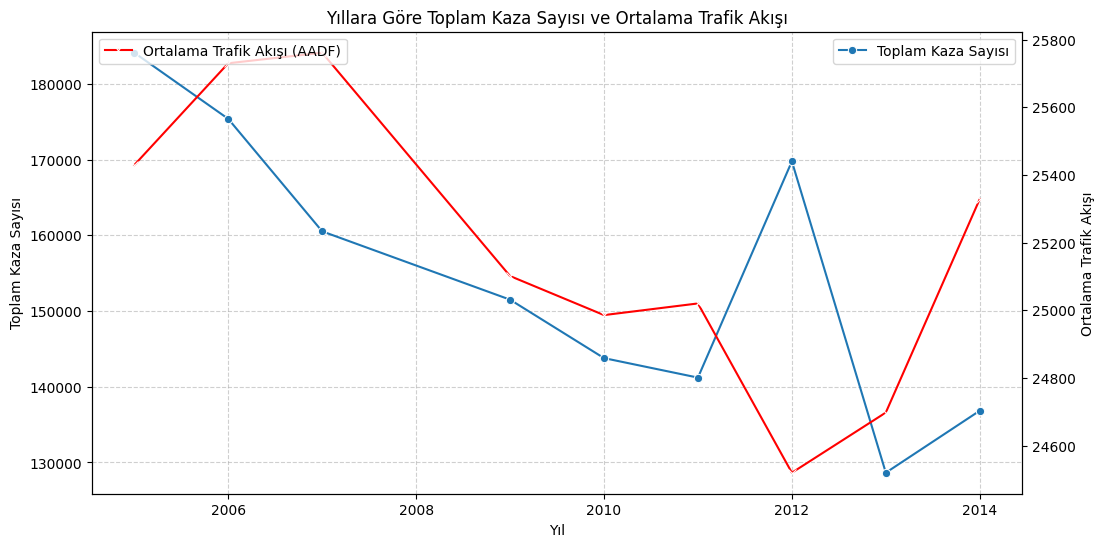

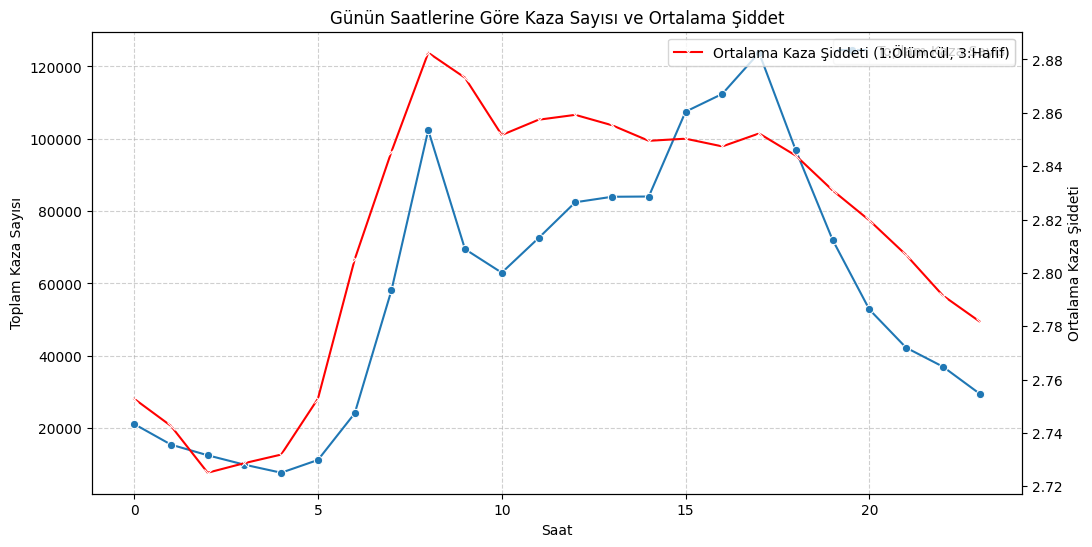


--- Kentsel ve Kırsal Alanlara Göre Kaza Özeti ---
  Urban_or_Rural_Area_Label  Total_Accidents  Avg_Severity  Avg_Traffic_Flow
1                     Urban           909453      2.863738      25173.595229
0                     Rural           482278      2.798015      25232.608406


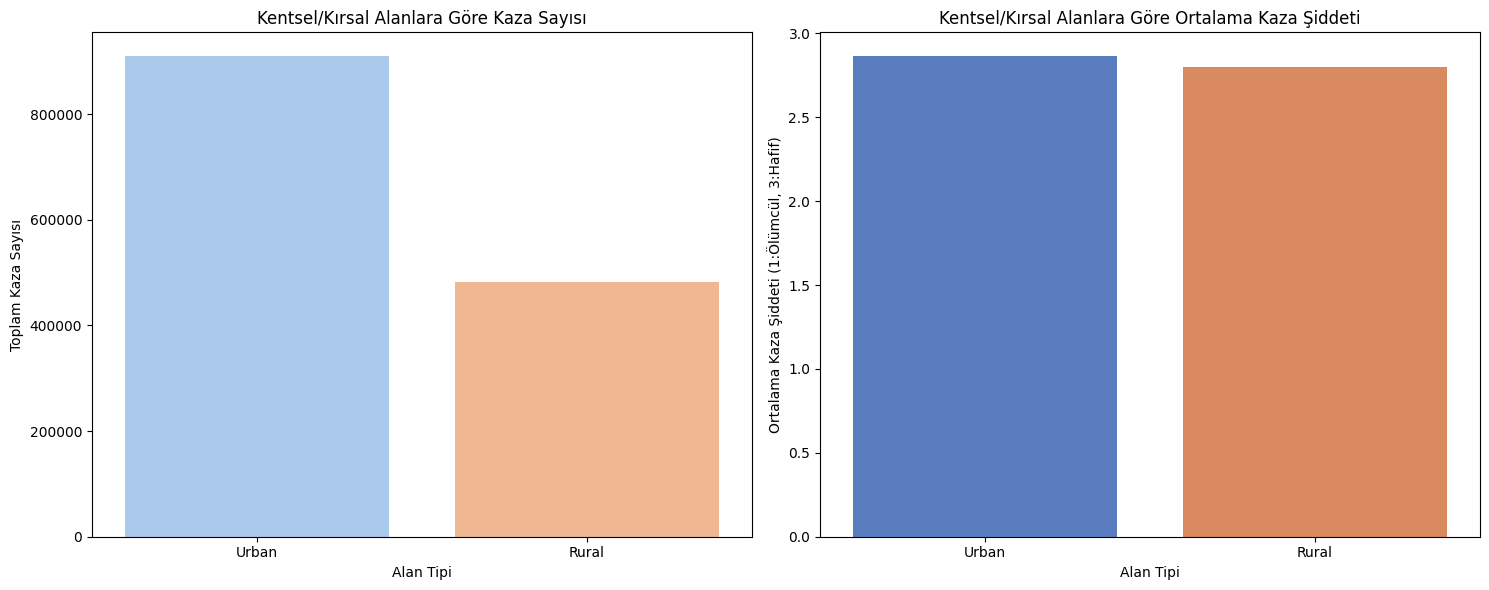


--- Kaza Şiddetine Göre Ortalama Trafik Akışı ---
   Accident_Severity  Average_Traffic_Flow  Total_Accidents
0                  1          23299.774667            17392
1                  2          23881.558126           186553
2                  3          25427.920202          1187786


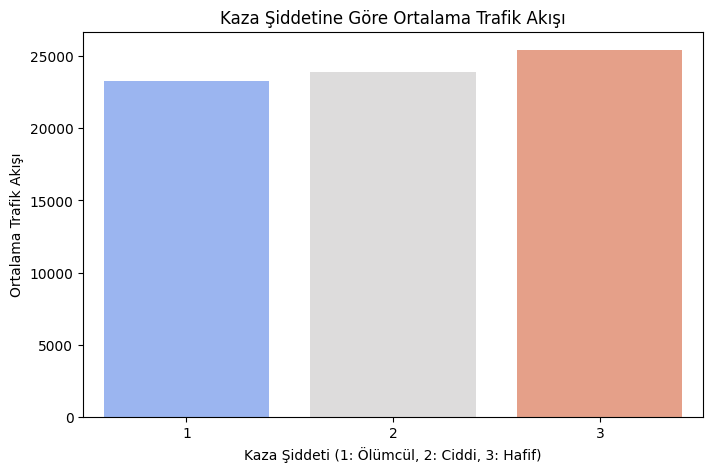

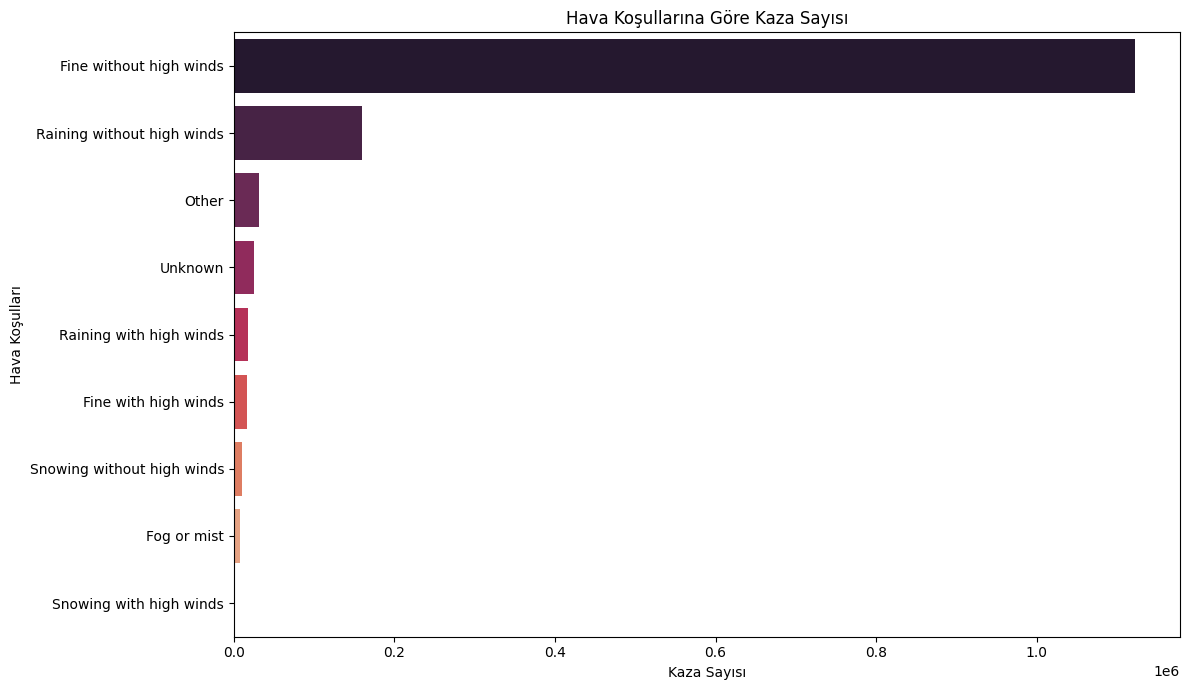

In [15]:
print("\n--- Keşifsel Veri Analizine Başlanıyor ---")

# --- Soru 1: Kazalar Yıllara Göre Nasıl Değişiyor? ---
# Yıllara göre kaza sayılarını ve trafik akışını karşılaştıralım.
yearly_summary = df_accidents.groupby('Year').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Average_Traffic_Flow=('Matched_Traffic_Flow', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_summary, x='Year', y='Total_Accidents', marker='o', label='Toplam Kaza Sayısı')
plt.title('Yıllara Göre Toplam Kaza Sayısı ve Ortalama Trafik Akışı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Kaza Sayısı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.twinx() # İkinci bir y ekseni ekle
sns.lineplot(data=yearly_summary, x='Year', y='Average_Traffic_Flow', marker='x', color='red', label='Ortalama Trafik Akışı (AADF)')
plt.ylabel('Ortalama Trafik Akışı')
plt.legend(loc='upper left')
plt.show()

# --- Soru 2: Günün Saatlerine Göre Kaza Dağılımı ve Şiddeti Nasıl Değişiyor? ---
# 'Hour' sütununu sayısal tipe dönüştürelim, bazı değerler pd.NA olduğu için object kalmış olabilir.
# NaN değerlerini şimdilik atlayalım veya belirli bir değerle dolduralım.
# df_accidents['Hour'] = pd.to_numeric(df_accidents['Hour'], errors='coerce')
# df_accidents.dropna(subset=['Hour'], inplace=True) # Saati olmayan kazaları şimdilik düşürelim
# df_accidents['Hour'] = df_accidents['Hour'].astype(int) # int'e çevirelim

# Önceki adımda Hour'ı object olarak bırakmıştık, burada int'e dönüştürelim
# Eğer hala pd.NA varsa sayısal değere çevirirken hata vermemesi için
df_accidents['Hour'] = df_accidents['Hour'].astype(str).str.split(':').str[0].astype(int) # Stringe çevirip sadece saat kısmını al

hourly_summary = df_accidents.groupby('Hour').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Avg_Severity=('Accident_Severity', 'mean') # Ortalama kaza şiddeti (düşük değer daha kötü)
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_summary, x='Hour', y='Total_Accidents', marker='o', label='Toplam Kaza Sayısı')
plt.title('Günün Saatlerine Göre Kaza Sayısı ve Ortalama Şiddet')
plt.xlabel('Saat')
plt.ylabel('Toplam Kaza Sayısı')
plt.grid(True, linestyle='--', alpha=0.6)
plt.twinx()
sns.lineplot(data=hourly_summary, x='Hour', y='Avg_Severity', marker='x', color='red', label='Ortalama Kaza Şiddeti (1:Ölümcül, 3:Hafif)')
plt.ylabel('Ortalama Kaza Şiddeti')
plt.legend(loc='upper right')
plt.show()


# --- Soru 3: Kentsel ve Kırsal Alanlardaki Kaza Dağılımı ve Şiddeti ---
# 'Urban_or_Rural_Area' sütunundaki değerleri açıklayıcı metinlere çevirelim
area_mapping = {1: 'Urban', 2: 'Rural', 3: 'Unknown'} # Eğer 3 varsa, Unknown olarak kabul edelim
df_accidents['Urban_or_Rural_Area_Label'] = df_accidents['Urban_or_Rural_Area'].map(area_mapping)

area_summary = df_accidents.groupby('Urban_or_Rural_Area_Label').agg(
    Total_Accidents=('Accident_Index', 'count'),
    Avg_Severity=('Accident_Severity', 'mean'),
    Avg_Traffic_Flow=('Matched_Traffic_Flow', 'mean')
).reset_index().sort_values(by='Total_Accidents', ascending=False)

print("\n--- Kentsel ve Kırsal Alanlara Göre Kaza Özeti ---")
print(area_summary)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) # 1 satır, 2 sütunlu grafiklerin ilki
sns.barplot(data=area_summary, x='Urban_or_Rural_Area_Label', y='Total_Accidents', palette='pastel')
plt.title('Kentsel/Kırsal Alanlara Göre Kaza Sayısı')
plt.xlabel('Alan Tipi')
plt.ylabel('Toplam Kaza Sayısı')

plt.subplot(1, 2, 2) # 1 satır, 2 sütunlu grafiklerin ikincisi
sns.barplot(data=area_summary, x='Urban_or_Rural_Area_Label', y='Avg_Severity', palette='muted')
plt.title('Kentsel/Kırsal Alanlara Göre Ortalama Kaza Şiddeti')
plt.xlabel('Alan Tipi')
plt.ylabel('Ortalama Kaza Şiddeti (1:Ölümcül, 3:Hafif)')
plt.tight_layout()
plt.show()

# --- Soru 4: Kaza Şiddeti ile Trafik Akışı Arasında Bir İlişki Var mı? ---
# Kaza şiddeti seviyelerine göre ortalama trafik akışını inceleyelim.
severity_traffic_summary = df_accidents.groupby('Accident_Severity').agg(
    Average_Traffic_Flow=('Matched_Traffic_Flow', 'mean'),
    Total_Accidents=('Accident_Index', 'count')
).reset_index().sort_values(by='Accident_Severity')

print("\n--- Kaza Şiddetine Göre Ortalama Trafik Akışı ---")
print(severity_traffic_summary)

plt.figure(figsize=(8, 5))
sns.barplot(data=severity_traffic_summary, x='Accident_Severity', y='Average_Traffic_Flow', palette='coolwarm')
plt.title('Kaza Şiddetine Göre Ortalama Trafik Akışı')
plt.xlabel('Kaza Şiddeti (1: Ölümcül, 2: Ciddi, 3: Hafif)')
plt.ylabel('Ortalama Trafik Akışı')
plt.show()

# --- Soru 5: Hava Koşullarının Kaza Sayısına Etkisi ---
weather_summary = df_accidents['Weather_Conditions'].value_counts().reset_index()
weather_summary.columns = ['Weather_Conditions', 'Accident_Count']

plt.figure(figsize=(12, 7))
sns.barplot(data=weather_summary, x='Accident_Count', y='Weather_Conditions', palette='rocket')
plt.title('Hava Koşullarına Göre Kaza Sayısı')
plt.xlabel('Kaza Sayısı')
plt.ylabel('Hava Koşulları')
plt.tight_layout()
plt.show()

## 🕵️‍♀️ Keşifsel Veri Analizi (EDA) Bulguları: Detaylı Yorumlama

Birleşik Krallık'taki trafik kazalarına ilişkin yapılan EDA çalışmaları, çeşitli çevresel ve trafik faktörleriyle kazalar arasındaki ilişkileri ortaya koymuştur. Aşağıda temel grafiksel analizlerin öne çıkan bulguları yer almaktadır:

---

### 1. 📉 Yıllara Göre Toplam Kaza Sayısı ve Ortalama Trafik Akışı

**Gözlemler:**
- 2005–2012 arasında toplam kaza sayısında istikrarlı bir düşüş gözlenmiştir.
- Ortalama trafik akışı da 2006 sonrası genel bir azalma trendi göstermektedir.
- 2012’de trafik düşerken kaza sayısı artmıştır → bu da tek başına trafik yoğunluğunun belirleyici olmadığını gösterir.

**Çıkarımlar:**
- Trafik akışı ve kaza sayısındaki düşüş paraleldir, ancak her zaman örtüşmemektedir.
- Bu düşüş; yol güvenliği tedbirleri, ulaşım tercihlerindeki değişiklikler ve ekonomik faktörlerle açıklanabilir.

---

### 2. ⏰ Günün Saatlerine Göre Kaza Sayısı ve Ortalama Şiddet

**Gözlemler:**
- En yoğun kazalar sabah (07:00–09:00) ve akşam (15:00–18:00) saatlerinde.
- Gece saatlerinde (00:00–05:00) kaza sayısı az, fakat şiddeti yüksektir.
- Pik saatlerde ise kaza sayısı fazla ama genellikle hafif kazalardır.

**Çıkarımlar:**
- Trafik yoğunluğu arttıkça kaza sayısı artmakta fakat şiddet düşmektedir.
- Gece kazaları daha azdır fakat daha ölümcül olabilir → muhtemel nedenler: hız, yorgunluk, alkol etkisi.

---

### 3. 🏙️ Kentsel ve Kırsal Alanlara Göre Kaza Dağılımı ve Şiddeti

**Gözlemler:**
- Kaza sayısı kentsel alanlarda daha fazladır (yaklaşık 2 kat).
- Şiddet bakımından kırsal kazalar daha ölümcül.
- Ortalama trafik akışı kentsel ve kırsal alanlarda benzerdir.

**Çıkarımlar:**
- Kentsel bölgelerde daha fazla kaza → yüksek nüfus, karmaşık yollar, yaya yoğunluğu.
- Kırsalda ise daha az ama daha ciddi kazalar → yüksek hızlar, düşük aydınlatma, geç müdahale gibi etkenler.
- Yalnızca trafik yoğunluğu değil, **fiziksel yol özellikleri** de önemli belirleyicidir.

---

### 4. 🚦 Kaza Şiddetine Göre Ortalama Trafik Akışı

**Gözlemler:**
- Hafif kazalar (Severity 3) en yaygın; ölümcül kazalar en az.
- Ortalama trafik akışı, kaza şiddeti arttıkça azalmakta.

**Çıkarımlar:**
- Yüksek trafik akışında kazalar daha hafif → düşük hızla çarpışmalar.
- Düşük trafik akışında ise kazalar daha ölümcül olabilir → hız faktörü etkili.
- Bu durum, **yoğun trafiğin kazaların sayısını artırsa da şiddetini düşürdüğü** hipotezini desteklemektedir.

---

### 5. 🌧️ Hava Koşullarına Göre Kaza Sayısı

**Gözlemler:**
- En çok kaza “Güzel hava” koşullarında yaşanmıştır.
- Yağmurlu hava kazaları önemli oranda artırmakta.
- Şiddetli hava koşullarında kaza sayısı düşmektedir.

**Çıkarımlar:**
- Güzel hava koşulları → yollar daha çok kullanıldığından kazalar fazladır.
- Yağmurlu hava → yol tutuşu azalır, kazalar artar.
- Şiddetli hava → sürücüler dikkatli olur, hız düşürülür veya seyahat iptal edilir → **davranışsal adaptasyon**.

---

### 📌 Genel Değerlendirme

EDA sonuçları, trafik kazalarının yalnızca trafik yoğunluğu ile değil; saat, hava durumu, alan türü gibi **çok boyutlu faktörlerle şekillendiğini** açıkça göstermektedir. Bu bulgular, ileri düzey modelleme aşamalarında dikkate alınarak daha doğru tahmin sistemlerinin geliştirilmesine katkı sağlayacaktır.
